In [10]:
import requests
import csv
import pandas as pd
import feedparser
import re

In [12]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import yake

In [38]:
file = open("Des_feed.csv","w",encoding="utf-8")
writer = csv.writer(file)
writer.writerow(["Title","Date","Description","Link"])
feed = open("urls_feed.txt","r")
urls = feed.read()
urls = urls.split("\n")

for url in urls:

    try:    
            f = feedparser.parse(url)
    except Exception as e:
            print('Could not parse the xml: ', url)
            print(e)
    for item in f.entries:
        r = re.compile(r"<[^>]*>")
        try:
            items_dicts = {'Title':item.title,'Date':item.published,'Description':r.sub(r"",item.summary),'Link':item.link}
        except:
            item_dicts = {'Title':item.title}
        f = csv.DictWriter(file, items_dicts.keys())
        f.writerow(items_dicts)

In [39]:
df = pd.read_csv("Des_feed.csv")
df.dropna(inplace=True)
df.isna().sum()

Title          0
Date           0
Description    0
Link           0
dtype: int64

In [40]:
df

,Title,Date,Description,Link
0,5 Best Practices for Performing Data Backup an...,"Mon, 20 Dec 2021 21:04:04 +0000",Data backup and recovery are critical for any ...,https://data-science-blog.com/blog/2021/12/20/...
1,process.science presents a new release,"Mon, 06 Dec 2021 08:32:53 +0000","process.science, specialist in the development...",https://data-science-blog.com/blog/2021/12/06/...
2,Data Science mit Python – Aktuelle Buchempfehl...,"Sat, 04 Dec 2021 09:56:08 +0000",Als Dozent für Data Science und Python Program...,https://data-science-blog.com/blog/2021/12/04/...
3,Business Intelligence – 5 Tips for better Repo...,"Sat, 06 Nov 2021 16:04:05 +0000",Data and BI Analysts often concentrate on lear...,https://data-science-blog.com/blog/2021/11/06/...
4,6 Ways to Optimize Your Database for Performance,"Mon, 25 Oct 2021 08:57:01 +0000",Knowing how to optimize your organization’s da...,https://data-science-blog.com/blog/2021/10/25/...
...,...,...,...,...
830,Moving From Data to Value at Scale,"Fri, 17 Dec 2021 15:28:33 GMT",\r\n \r\n \r\nThis is a blog post from ...,https://blog.dataiku.com/moving-from-data-to-v...
831,Let’s Talk About Data Visualization! Featuring...,"Thu, 16 Dec 2021 14:16:00 GMT",\r\n \r\n \r\nIn this episode of the Ba...,https://blog.dataiku.com/data-visualization
832,3 Trends in Retail & CPG for 2022,"Wed, 15 Dec 2021 17:23:51 GMT","\r\n \r\n \r\nIn the past two years, re...",https://blog.dataiku.com/3-trends-in-retail-cp...
833,A Ride on the Rocket Ship: How We Scaled in 20...,"Tue, 14 Dec 2021 15:02:09 GMT",\r\n \r\n \r\nBesides preparing our ant...,https://blog.dataiku.com/how-we-scaled-strengt...


In [23]:
desc_1 = []
for text in df["Description"]:
    desc_1.append(re.sub("\s+"," ",text).lower())
desc_2 = []
for text in desc_1:
    desc_2.append(re.sub("\[.+\]","",text))
desc_3 = []
for text in desc_2:
    desc_3.append(re.sub("&.+;","",text))
desc_4 = []
for text in desc_3:
    desc_4.append(re.sub(r'http\S+', '',text))
clean_desc = []
for text in desc_4:
    clean_desc.append(re.sub(r'[^\w\s]',"",text))

In [25]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ravishankar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [26]:
stop_words=set(stopwords.words("english"))
wnet = WordNetLemmatizer()
port = PorterStemmer()
stop_words_2 = []
condition = ['not','nor','no']
for words in stop_words:
    if words not in condition:
        stop_words_2.append(words)
def lemmatize_text(text):
    words = word_tokenize(text)
    words_2 = []
    lemm_2 = ""
    for word in words:
        if word not in stop_words_2:
            words_2.append(word)
    for word in words_2:
        lemm = wnet.lemmatize(word)
        lemm_2+=lemm+" "
    return lemm_2

In [28]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ravishankar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [29]:
lemm_desc = ""
for text in clean_desc:
    lemm_desc+=lemmatize_text(text)+" "
language = "en"
max_ngram_size = 2
deduplication_thresold = 0.9
deduplication_algo = 'seqm'
windowSize = 1
numOfKeywords = 100

custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_thresold, dedupFunc=deduplication_algo, windowsSize=windowSize, top=numOfKeywords, features=None)
keywords = custom_kw_extractor.extract_keywords(lemm_desc)

for kw in keywords:
    print(kw)

('data science', 7.695160674430793e-07)
('data scientist', 1.694520835930289e-06)
('machine learning', 1.7208172279320452e-06)
('data blogger', 1.7786966033995949e-06)
('big data', 3.0748108518991795e-06)
('post data', 5.576344708413902e-06)
('data data', 5.611455874808104e-06)
('blog post', 7.06033889685304e-06)
('data', 9.101767890689232e-06)
('data analytics', 9.205674093808416e-06)
('continue reading', 9.612429935087342e-06)
('learning model', 1.0580278294362561e-05)
('science blog', 1.134784851883036e-05)
('appeared john', 1.1386971862101172e-05)
('deep learning', 1.4672114371369815e-05)
('learning data', 1.5368542661581055e-05)
('neural network', 1.565167870337959e-05)
('analytics world', 1.820103528366646e-05)
('data appeared', 1.8781444057705085e-05)
('data post', 1.8959572008607268e-05)
('science machine', 2.123072804742107e-05)
('predictive analytics', 2.2163588224902565e-05)
('blog data', 2.5074546224423488e-05)
('data model', 2.5753460626134558e-05)
('data set', 2.659148771

In [30]:
kw = pd.DataFrame(keywords,columns=['keywords','tf idf'])
kw

,keywords,tf idf
0,data science,7.695161e-07
1,data scientist,1.694521e-06
2,machine learning,1.720817e-06
3,data blogger,1.778697e-06
4,big data,3.074811e-06
...,...,...
95,unlabeled data,7.785612e-05
96,learning post,7.789108e-05
97,algorithm appeared,7.866010e-05
98,modern data,7.866457e-05


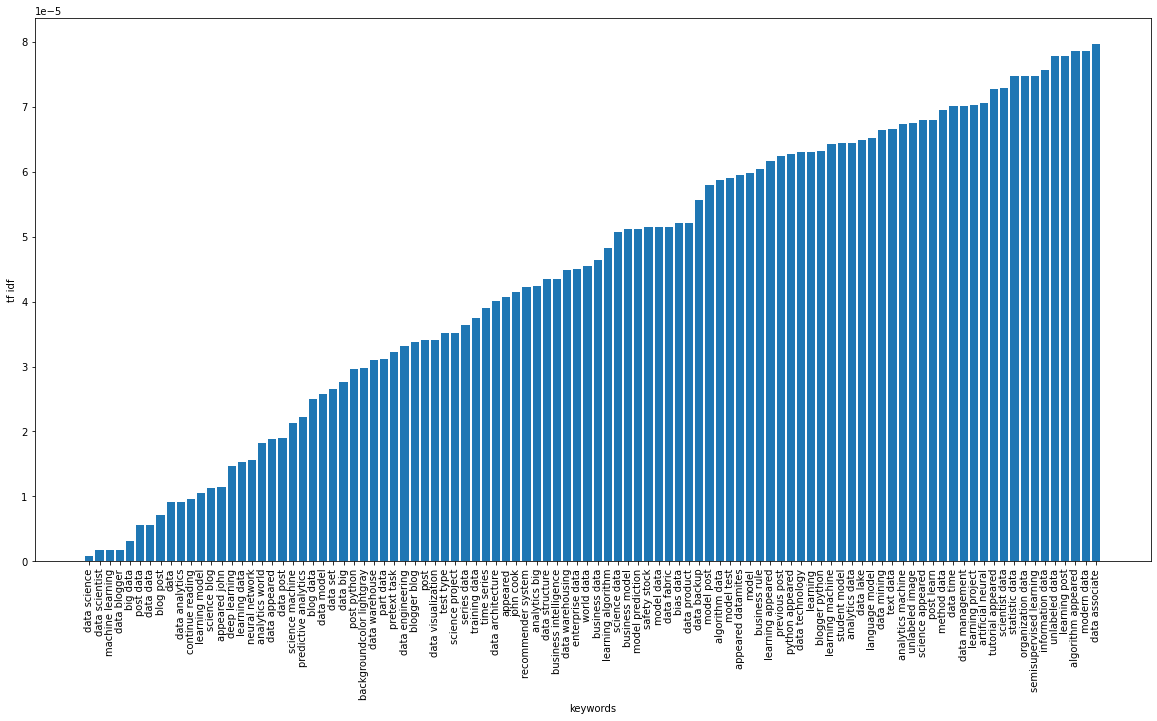

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
fig ,ax = plt.subplots(figsize=(20,10))
ax.bar(kw['keywords'],kw['tf idf'])
plt.xticks(rotation='vertical')
plt.xlabel('keywords')
plt.ylabel('tf idf');